In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import cvxpy as cp
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

### Data load

In [2]:
# df_ori = pd.read_csv('./data/adjclose_10.csv', sep=',')
# df_ori['cash'] = 1
df_ori = pd.read_csv('./data/adjclose_100.csv', sep=',')
# df_ori = pd.read_csv('./data/adjclose_200.csv', sep=',')
#df_ori = pd.read_csv('./data/adjclose_390.csv', sep=',')
df_ori.head()

,Date,AAPL,ABT,ACN,ADBE,ADI,ADP,AMAT,AMD,AMGN,...,TMO,TXN,UNH,UNP,UPS,VRTX,VZ,WFC,WMT,XOM
0,2003-12-01,0.328628,12.641927,18.253563,21.010983,31.728966,19.435575,17.851242,18.070000,42.911766,...,22.943556,19.876213,22.166023,10.874557,41.826843,9.36,11.135653,16.427286,36.405926,18.915049
1,2003-12-02,0.326054,12.717790,18.476860,20.571692,31.486849,19.485493,17.740637,17.900000,42.665436,...,22.695620,19.830112,22.275522,10.834273,41.456890,9.21,11.067695,16.262320,35.417294,18.972227
2,2003-12-03,0.318334,12.723415,18.714575,20.796329,31.091839,19.195936,17.504692,17.290001,42.629215,...,22.695620,19.428366,22.105175,10.871202,41.570724,8.88,10.955559,16.142838,35.196846,18.993017
3,2003-12-04,0.320151,12.743079,18.440844,20.791340,30.932539,19.400625,17.121265,16.660000,43.187080,...,22.514439,19.191277,21.975384,10.953459,41.878052,9.10,11.298765,16.191193,35.417294,19.242523
4,2003-12-05,0.315609,12.633499,18.246351,19.418562,30.046944,19.400625,16.472399,16.070000,42.237999,...,22.466757,18.677580,21.642797,10.985355,41.673180,9.21,11.349733,16.157064,35.724567,19.117754


In [3]:
df_ori.set_index('Date', inplace=True)
df_ori = df_ori.dropna(axis=1)
df_ori.index = pd.DatetimeIndex(df_ori.index)
# ENDTIME = pd.to_datetime('2008-12-31')
# df_ori = df_ori.loc[df_ori.index <= ENDTIME]
df_ori.tail()

,AAPL,ABT,ACN,ADBE,ADI,ADP,AMAT,AMD,AMGN,AMT,...,TMO,TXN,UNH,UNP,UPS,VRTX,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-22,191.309998,102.699997,333.130005,619.719971,182.669998,231.149994,149.479996,122.510002,264.589996,198.789993,...,487.529999,153.929993,543.760010,223.490005,150.750000,353.230011,37.349998,42.779999,154.669998,104.010002
2023-11-24,189.970001,102.870003,334.040009,619.429993,183.050003,230.660004,150.339996,122.309998,265.459991,199.320007,...,490.779999,153.589996,547.099976,224.279999,152.029999,353.040009,37.410000,42.919998,156.059998,104.570000
2023-11-27,189.789993,102.709999,332.429993,619.270020,183.770004,229.160004,150.809998,122.650002,264.269989,201.210007,...,490.130005,152.600006,543.590027,219.850006,149.589996,350.190002,37.349998,43.020000,156.770004,103.959999
2023-11-28,190.399994,102.059998,332.559998,623.320007,183.199997,228.990005,148.059998,122.010002,265.519989,203.220001,...,485.920013,152.899994,540.530029,221.229996,150.740005,347.040009,37.470001,43.369999,158.639999,103.900002
2023-11-29,189.369995,103.629997,333.339996,617.390015,182.710007,229.160004,149.360001,123.849998,266.600006,206.179993,...,492.920013,153.199997,534.979980,221.470001,152.289993,351.000000,37.759998,43.779999,156.080002,102.339996


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:03<00:00, 28.61it/s]


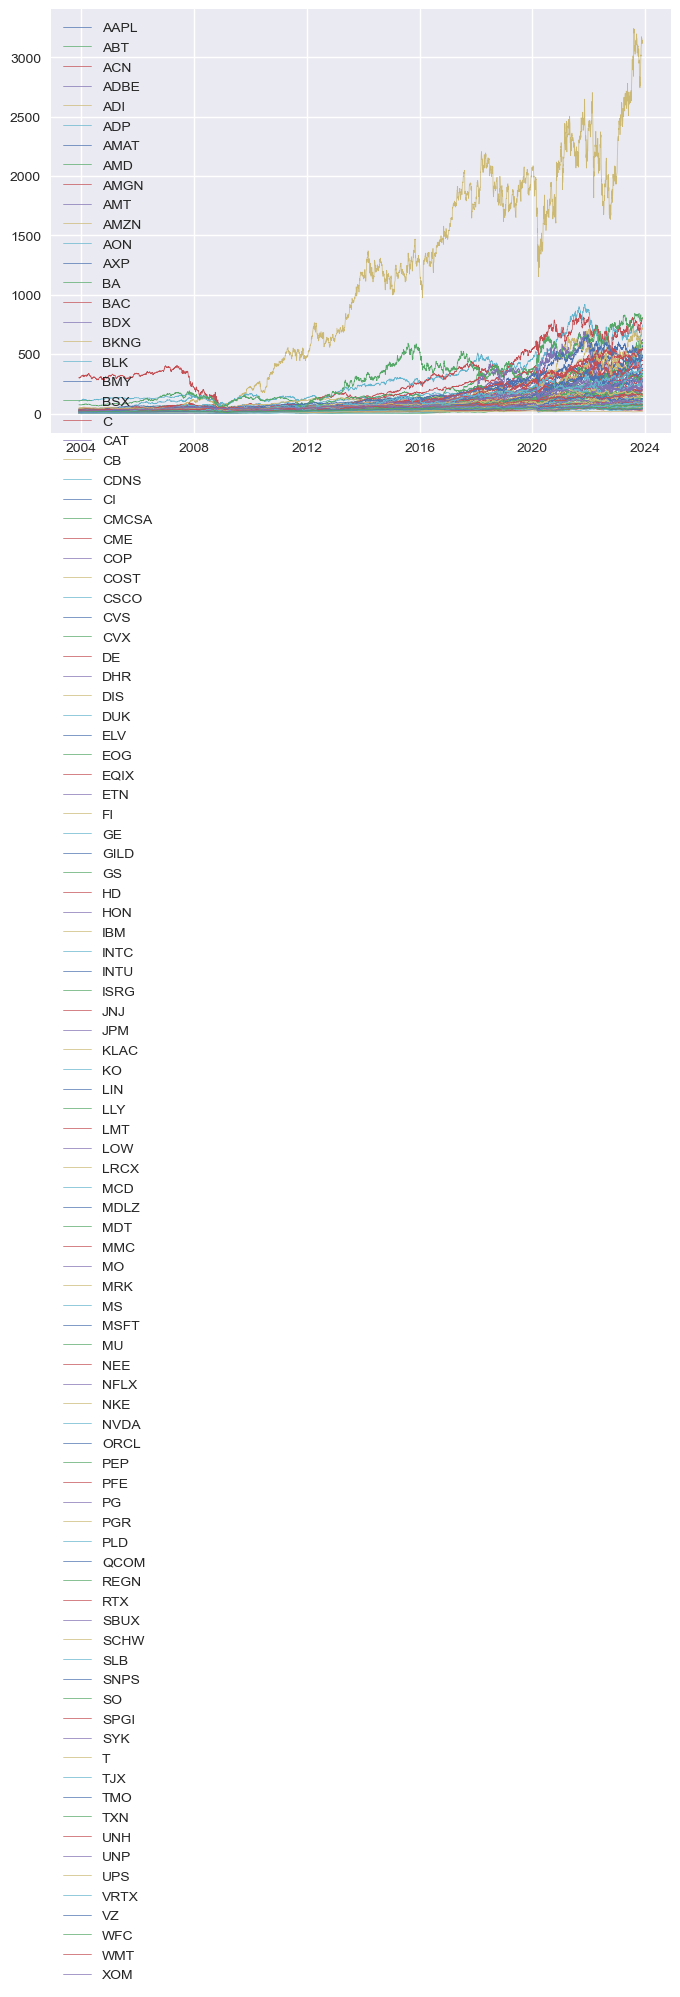

In [4]:
plt.figure()
for stk in tqdm(df_ori.columns):
    plt.plot(df_ori.index, df_ori.loc[:,stk], linewidth=0.5, label=stk)
    plt.legend(loc='best')
# plt.plot(df_ori.index, df_ori.iloc[:,232], linewidth=0.5, label='MNST')
#plt.savefig('./result/data_part/390_stocks_performance.png',bbox_inches='tight')
plt.show()

In [7]:

df = df_ori.pct_change().iloc[1:,:]
# df['cash']=(1.1)**(1/252)-1
df.head()

,AAPL,ABT,ACN,ADBE,ADI,ADP,AMAT,AMD,AMGN,AMT,...,TMO,TXN,UNH,UNP,UPS,VRTX,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-02,-0.007831,0.006001,0.012233,-0.020908,-0.007631,0.002568,-0.006196,-0.009408,-0.005740,-0.007860,...,-0.010806,-0.002319,0.004940,-0.003704,-0.008845,-0.016026,-0.006103,-0.010042,-0.027156,0.003023
2003-12-03,-0.023676,0.000442,0.012866,0.010920,-0.012545,-0.014860,-0.013300,-0.034078,-0.000849,-0.014965,...,0.000000,-0.020259,-0.007647,0.003409,0.002746,-0.035831,-0.010132,-0.007347,-0.006224,0.001096
2003-12-04,0.005706,0.001545,-0.014627,-0.000240,-0.005124,0.010663,-0.021904,-0.036437,0.013086,-0.025022,...,-0.007983,-0.012203,-0.005872,0.007566,0.007393,0.024775,0.031327,0.002995,0.006263,0.013137
2003-12-05,-0.014187,-0.008599,-0.010547,-0.066026,-0.028630,0.000000,-0.037898,-0.035414,-0.021976,0.001834,...,-0.002118,-0.026767,-0.015134,0.002912,-0.004892,0.012088,0.004511,-0.002108,0.008676,-0.006484
2003-12-08,0.009594,0.007784,-0.011054,0.013625,-0.011875,-0.004375,0.004924,-0.020535,-0.006004,-0.006405,...,-0.007216,-0.004231,0.007496,0.003070,0.002595,0.003257,-0.011676,0.007218,-0.001496,0.016858


In [8]:
df = df.dropna(axis=1)
df.isnull().sum().sum()

0

In [9]:
df.head()

,AAPL,ABT,ACN,ADBE,ADI,ADP,AMAT,AMD,AMGN,AMT,...,TMO,TXN,UNH,UNP,UPS,VRTX,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-02,-0.007831,0.006001,0.012233,-0.020908,-0.007631,0.002568,-0.006196,-0.009408,-0.005740,-0.007860,...,-0.010806,-0.002319,0.004940,-0.003704,-0.008845,-0.016026,-0.006103,-0.010042,-0.027156,0.003023
2003-12-03,-0.023676,0.000442,0.012866,0.010920,-0.012545,-0.014860,-0.013300,-0.034078,-0.000849,-0.014965,...,0.000000,-0.020259,-0.007647,0.003409,0.002746,-0.035831,-0.010132,-0.007347,-0.006224,0.001096
2003-12-04,0.005706,0.001545,-0.014627,-0.000240,-0.005124,0.010663,-0.021904,-0.036437,0.013086,-0.025022,...,-0.007983,-0.012203,-0.005872,0.007566,0.007393,0.024775,0.031327,0.002995,0.006263,0.013137
2003-12-05,-0.014187,-0.008599,-0.010547,-0.066026,-0.028630,0.000000,-0.037898,-0.035414,-0.021976,0.001834,...,-0.002118,-0.026767,-0.015134,0.002912,-0.004892,0.012088,0.004511,-0.002108,0.008676,-0.006484
2003-12-08,0.009594,0.007784,-0.011054,0.013625,-0.011875,-0.004375,0.004924,-0.020535,-0.006004,-0.006405,...,-0.007216,-0.004231,0.007496,0.003070,0.002595,0.003257,-0.011676,0.007218,-0.001496,0.016858


### equally weighted

In [10]:
def equally_weighted(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1 / len(df.columns)] * len(df.columns))
    ret_EW=[]
    # print(cur_stg)

    for i in range(len(df)):
        cur_ret_EW=np.dot(cur_stg, 1 + df.iloc[i,:].values)
        cur_pfl = cur_pfl * cur_ret_EW
        arr_pfl.append(cur_pfl)
        ret_EW.append(cur_ret_EW)

    return arr_pfl,ret_EW

arr_equal, ret_EW= equally_weighted(df)

### BCRP

In [9]:
test_df=pd.DataFrame({'A':[2,0.5,2,0.5],"B":[0.5,2,0.5,2],"C":[1,2,3,4]})
test_df

,A,B,C
0,2.0,0.5,1
1,0.5,2.0,2
2,2.0,0.5,3
3,0.5,2.0,4


In [10]:
#Best constant rebalanced portfolio in hindsight
def BCRP(df):
    x=cp.Variable(len(df.columns),nonneg=True)
    objective=cp.Maximize(cp.sum(cp.log(1+df.values@x)))
    constrains=[cp.sum(x)<=1]
    problem=cp.Problem(objective,constrains)
    result=problem.solve(solver=cp.ECOS)
    weight=x.value
    arr_pfl = [1]
    cur_pfl = 1
    for i in range(len(df)):
        cur_pfl = cur_pfl * np.dot(weight, 1 + df.iloc[i,:].values)
        arr_pfl.append(cur_pfl)
    return weight,arr_pfl
weight_BCRP,arr_BCRP=BCRP(df)
weight_BCRP

array([4.82875396e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.31667459e-13, 0.00000000e+00, 3.20352650e-13,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.37293494e-12, 1.08394067e-12, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.26136169e-12, 7.13638673e-14,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.30147568e-13,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.09662761e-12, 2.03608768e-13, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.75260231e-12, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.17124604e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

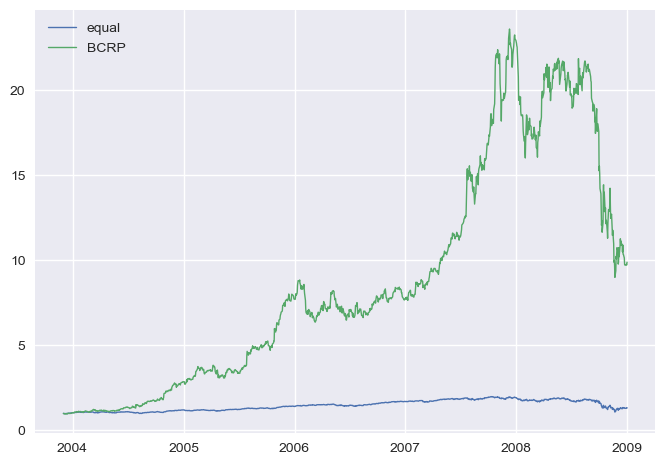

In [11]:

plt.figure()
# plt.plot(df.index, arr_pfl[:-1], linewidth=0.5, label='OGD')
plt.plot(df.index, arr_equal[:-1], linewidth=1, label='equal')
plt.plot(df.index,arr_BCRP[:-1], linewidth=1, label='BCRP')
#plt.savefig('./result/data_part/BCRP_ performance_390.png',bbox_inches='tight')
plt.legend(loc='best')
plt.show()

### loss function

In [11]:
df_num=df.values

In [12]:
def minstrategy_regret(df_num):
    x=cp.Variable(df_num.shape[1],nonneg=True)
    objective=cp.Minimize(cp.sum(-1*cp.log(1+df_num)@x))
    constrains=[cp.sum(x)==1]
    prob=cp.Problem(objective,constrains)
    result=prob.solve(solver=cp.ECOS)
    return objective.value
xmin=minstrategy_regret(df_num[0:10])
xmin
    
    

-0.09351419260978819

In [13]:
def minstrategy_regret_x(df_num):
    x=cp.Variable(df_num.shape[1],nonneg=True)
    objective=cp.Minimize(cp.sum(-1*cp.log(1+df_num)@x))
    constrains=[cp.sum(x)==1]
    prob=cp.Problem(objective,constrains)
    result=prob.solve(solver=cp.ECOS)
    return x.value
#xmin=minstrategy_regret_x(df_num)

In [14]:
minstrategy_re=[]
for i in tqdm(range(df_num.shape[0])):
    x=minstrategy_regret(df_num[:i+1,:])
    minstrategy_re.append(x)

    

100%|██████████| 5033/5033 [02:48<00:00, 29.88it/s]


$$
\text{Regret}=\sum_{\tau=1}^{T}\langle g,x_{\tau}\rangle-\min_{x \in X}\sum_{\tau=1}^{T}\langle g,x\rangle
$$

$$
\text{loss}=-\ln(1+return_{t-1}\mathbf{x})
$$
$$
\text{gradient}=-\ln (1+return_{t-1})
$$

### OGD

In [15]:
# begin OGD process
# import math

def OGD_update(x_old, ETA, loss, num_of_var):
    x = cp.Variable(num_of_var, nonneg=True)
    # x = cp.Variable(num_of_var, nonneg=False)
    # objective = cp.Minimize(ETA * np.array(loss) @ x + 0.5 * cp.sum((x - x_old) ** 2))
    objective = cp.Minimize(cp.norm(x_old-ETA*loss-x,2))
    constraints = [cp.sum(x) == 1]
    prob = cp.Problem(objective, constraints)
    result = prob.solve(solver='SCS')

    return x.value

def OGD_algo(df_num):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1
    # regret=0

    for i in tqdm(range(len(df))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
       
       
        ETA=0.08

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (np.log(df_num[i,:]+1))
        regre=regre+(direction@cur_stg)
        # regremin=minstrategy_regret(df_num[:i+1,:])
        regret=regre-minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        cur_stg = OGD_update(cur_stg, ETA, direction, len(df.columns))
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight,acu_regret,avg_regret

arr_pfl_OGD , arr_stg_OGD , ret_OGD, weight_OGD,acu_regret_OGD,avg_regret_OGD= OGD_algo(df_num)

100%|██████████| 5033/5033 [00:46<00:00, 109.14it/s]


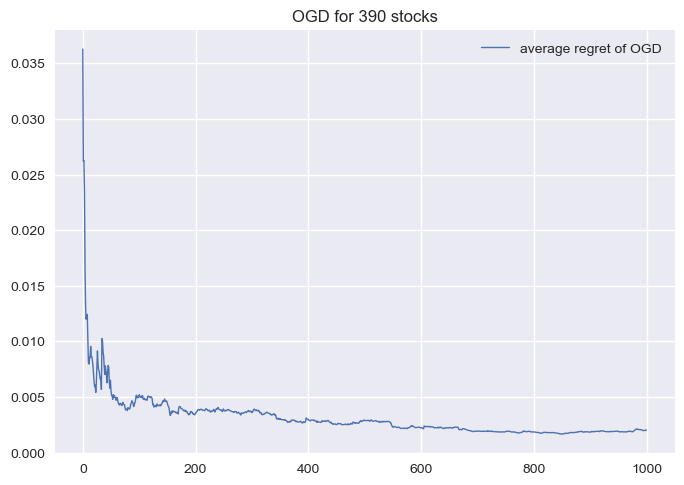

In [27]:
plt.figure()
plt.plot(avg_regret_OGD[:1000], linewidth=1, label='average regret of OGD')
plt.legend(loc='best')
#plt.savefig('./result/OGD_part/OGDloss_for_390_stocks.png',bbox_inches='tight') 
plt.title('OGD for 390 stocks')
plt.show()

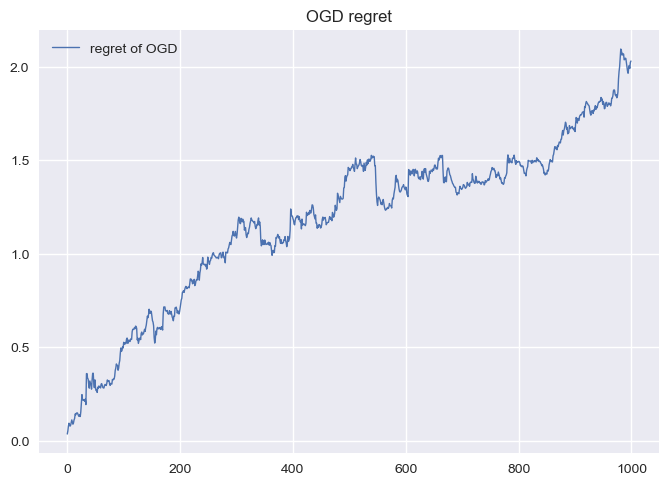

In [28]:
plt.figure()
plt.plot(acu_regret_OGD[:1000], linewidth=1, label='regret of OGD')
plt.legend(loc='best')
#plt.savefig('./result/OGD_part/OGDregret_for_390 stocks.png',bbox_inches='tight') 
plt.title('OGD regret')
plt.show()

### OMD

In [16]:
# begin OMD process
# import math

def OMD_update(x_old, loss, num_of_var, A):
    x = cp.Variable(num_of_var, nonneg=True)
    #x = cp.Variable(num_of_var)
    objective = cp.Minimize(loss @ x + 0.5 * (x.T@A@x)-(x.T@A@x_old))
    constraints = [cp.sum(x) == 1]
    prob = cp.Problem(objective, constraints)
    result = prob.solve()

    return x.value

def OMD_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1

    for i in tqdm(range(len(df))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(df_num[i,:]+1)
        # OMD to find strategy in the next round
        ETA=0.5
        a=ETA+cur_stg
        A=np.diag(a)
        last_stg = cur_stg.copy()
        regre=regre+(direction@cur_stg)
        #regremin=minstrategy_regret(df_num[:i+1,:])
        regret=regre-minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        cur_stg = OMD_update(cur_stg, direction, len(df.columns),A)
        arr_stg.append(cur_stg)
        

    return arr_pfl , arr_stg, ret, weight,avg_regret, acu_regret


arr_pfl_OMD , arr_stg_OMD , ret_OMD, weight_OMD,avg_regret_OMD,acu_regret_OMD= OMD_algo(df)

100%|██████████| 5033/5033 [00:41<00:00, 120.71it/s]


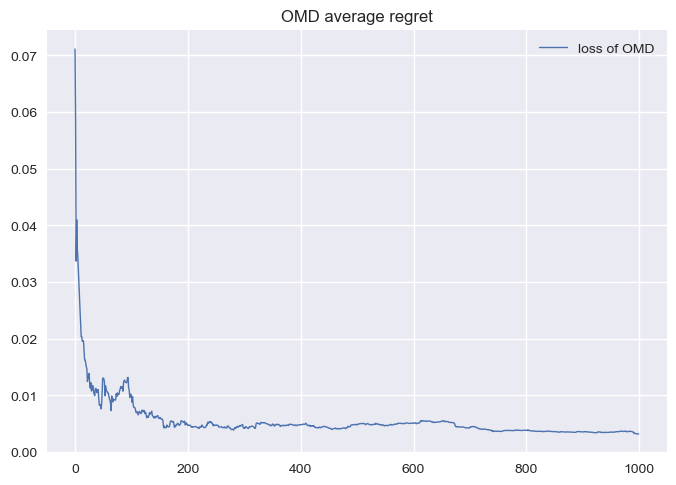

In [20]:
plt.figure()
plt.plot(avg_regret_OMD[:1000], linewidth=1, label='loss of OMD')
plt.legend(loc='best')
#plt.savefig('./result/OMD_for_390_stocks.png',bbox_inches='tight') 
plt.title('OMD average regret')
plt.show()

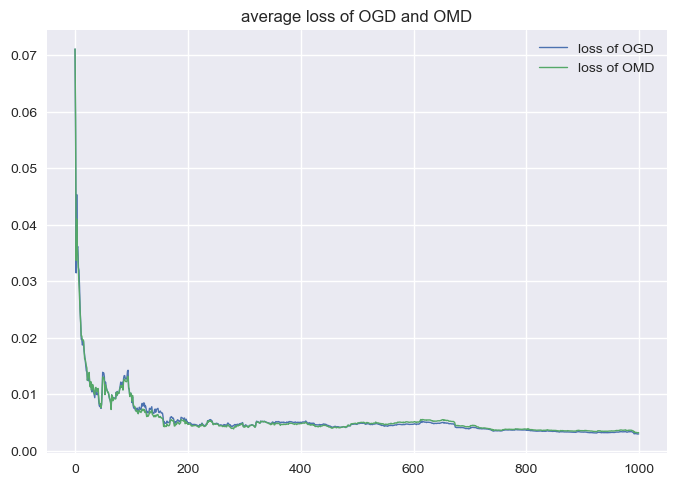

In [21]:
plt.figure()
plt.plot(avg_regret_OGD[:1000], linewidth=1, label='loss of OGD')
plt.plot(avg_regret_OMD[:1000], linewidth=1, label='loss of OMD')
plt.legend(loc='best')
#plt.savefig('./result/OGDandOMD_for_390 stocks.png',bbox_inches='tight') 
plt.title('average loss of OGD and OMD')
plt.show()

### buy and hold

In [17]:
#buy and hold
def buy_and_hold(df_ori):
    arr_pfl = [1]
    ret=[1]
    stg = np.array([1/len(df_ori.columns)] * len(df_ori.columns))
    arr_stg=[stg]
    units=stg/df_ori.iloc[0,:].values
    for i in range(1,len(df_ori)):
        cur_pfl=df_ori.iloc[i,:].values@units
        cur_ret=cur_pfl/arr_pfl[-1]
        cur_stg=np.multiply(df_ori.iloc[i,:].values,units)/np.dot(df_ori.iloc[i,:].values,units)
        arr_pfl.append(cur_pfl)
        arr_stg.append(cur_stg)
        ret.append(cur_ret)
    return arr_pfl,arr_stg,ret[:-1]

arr_pfl_BH,arr_stg_BH,ret_BH=buy_and_hold(df_ori)

    


### EG algorithm

In [66]:
# EG algorithm
def EG_update(x_old,loss,ETA):
    x=np.multiply(x_old,np.exp(-1*loss*ETA)/np.dot(x_old,np.exp(-1*loss*ETA)))
    return x
                  
def EG_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    ret=[]
    weight=[sum(cur_stg)]
    ETA=5

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(np.array(df.iloc[i,:].values)+1)
        last_stg = cur_stg.copy()
        
        cur_stg = EG_update(cur_stg, direction, ETA)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_EG , arr_stg_EG , ret_EG, weight_EG= EG_algo(df)  

  0%|          | 0/5033 [00:00<?, ?it/s]

100%|██████████| 5033/5033 [00:01<00:00, 2857.44it/s]


### RM algorithms

In [19]:
#RM algorithms
def RM_update(regret_old,x_old,loss):
    regret=(regret_old)+(np.dot(loss,x_old)-loss)
    x=np.maximum(regret,0)/np.sum(np.maximum(regret,0))
    return regret, x

def RM_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 1e-3
    ret=[]
    weight=[sum(cur_stg)]
    
    regret_old=0
    flag=1

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(np.array(df.iloc[i,:].values)+1)
        last_stg = cur_stg.copy()
     
        regret_old,cur_stg = RM_update(regret_old,cur_stg ,direction)

        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_RM , arr_stg_RM , ret_RM, weight_RM= RM_algo(df)  


100%|██████████| 5033/5033 [00:01<00:00, 3241.77it/s]


In [20]:
#RM+ algorithms
def RMPLUS_update(regret_old,x_old,loss):
    regret=np.maximum(regret_old+(np.dot(loss,x_old)-loss),0)
    x=regret/np.sum(regret)
    return regret, x

def RMPLUS_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 1e-3
    ret=[]
    weight=[sum(cur_stg)]
    ETA=1.2
    regret_old=0

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(np.array(df.iloc[i,:].values)+1)
        last_stg = cur_stg.copy()
        
        regret_old,cur_stg = RMPLUS_update(regret_old,cur_stg ,direction)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_RMPLUS, arr_stg_RMPLUS , ret_RMPLUS, weight_RMPLUS= RMPLUS_algo(df)  

100%|██████████| 5033/5033 [00:01<00:00, 3342.04it/s]


### market cap strategy

In [21]:
# import yfinance as yf
# def get_outstanding(df):    
#     ticker=list(df.columns)
#     outstanding=[]
#     for i in tqdm(ticker[:-1]):
#         stock=yf.Ticker(i)
#         info=stock.info
#         shares_outstanding = info.get('sharesOutstanding', 'No data')
#         outstanding.append(shares_outstanding)
#     return pd.DataFrame([outstanding],columns=ticker[:-1])
# outstanding_df=get_outstanding(df)
outstanding_df=pd.read_csv('./data/outstanding_100.csv')
outstanding=outstanding_df.values
market_cap=df_ori.values*outstanding
share=market_cap/np.sum(market_cap,axis=1)[:,np.newaxis]
arr_stg_MC=share
ret=np.sum(df_num[:,:-1]*share[:-1,:],axis=1)
ret_MC=ret+1
arr_pfl_MC=np.cumprod(1+ret)
arr_pfl_MC=np.insert(arr_pfl_MC,0,1)
arr_pfl_MC.shape

    

ValueError: operands could not be broadcast together with shapes (5034,100) (1,391) 

In [28]:
import yfinance as yf
def get_outstanding(df):    
    ticker=list(df.columns)
    outstanding=[]
    for i in tqdm(ticker[:-1]):
        stock=yf.Ticker(i)
        info=stock.info
        shares_outstanding = info.get('sharesOutstanding', 'No data')
        outstanding.append(shares_outstanding)
    return pd.DataFrame([outstanding],columns=ticker[:-1])
outstanding_df=get_outstanding(df)
outstanding_df.to_csv('./data/outstanding_100.csv')

100%|██████████| 390/390 [01:04<00:00,  6.04it/s]


### ONS

$regret=\sum_{1}^{T}(-\log{wr_t})-\max_{w\in W} \sum_{1}^{t}-\log{wr}$

ONS use loss function as $loss=-\log{(w*r)}$

$gradient=\frac{w}{w*r}$
$hessian=\frac{r^Tr}{(w*r)^2}$

In [12]:
def minstrategy_logregret(df_num):
    try:
        x=cp.Variable(df_num.shape[1],nonneg=True)
        objective=cp.Minimize(cp.sum(-1*cp.log((1+df_num)@x)))
        constrains=[cp.sum(x)==1]
        prob=cp.Problem(objective,constrains)
        result=prob.solve(cp.ECOS)
    except:
        x=cp.Variable(df_num.shape[1],nonneg=True)
        objective=cp.Minimize(cp.sum(-1*cp.log((1+df_num)@x)))
        constrains=[cp.sum(x)==1]
        prob=cp.Problem(objective,constrains)
        result=prob.solve(solver=cp.SCS)
        
    return -objective.value
xmin=minstrategy_logregret(df_num[0:8])
xmin

0.09490871501429164

In [13]:
minstrategy_logre=[]
for i in tqdm(range(df_num.shape[0])):
    x=minstrategy_logregret(df_num[:i+1,:])
    minstrategy_logre.append(x)

  0%|          | 0/1280 [00:00<?, ?it/s]

100%|██████████| 1280/1280 [08:52<00:00,  2.40it/s]


In [24]:
def projection_ONS(q,A,num_variables):
    x=cp.Variable(num_variables,nonneg=True)
    constrains=[sum(x)==1]
    v=cp.quad_form(q-x,cp.psd_wrap(A))
    obejctive=cp.Minimize(v)
    problem=cp.Problem(obejctive,constrains)
    result=problem.solve(solver='OSQP')
    return x.value
def ONS_update(eta,delta,beta,cum_grad,cum_hessian,num_variables):
    a=np.full(num_variables,1/num_variables)
    b=(1+1/beta)*cum_grad
    I=np.eye(num_variables)
    A=cum_hessian+I
    A_inv=np.linalg.inv(A)
    q=delta*(A_inv@b)
    p=projection_ONS(q,A,num_variables)
    p=(1-eta)*p+eta*a
    return p

In [107]:
def ONS_algo(df_num):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    #calculate regret
    # regre=0
    # acu_regret=[]
    # avg_regret=[]
    cum_grad=np.zeros(len(df.columns))
    cum_hessian=np.zeros((len(df.columns),len(df.columns)))
    # T=1
    # regret=0

    for i in tqdm(range(len(df))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
        arr_pfl.append(cur_pfl)
        
        eta=0.1
        delta=0.1
        beta=1.5
        #calculate regret
        # regre=regre+np.log(cur_ret)
        # regret=minstrategy_logre[i]-regre
        # acu_regret.append(regret)
        # avg_regret.append(regret/T)
        # T+=1
        deriction=(1+df_num[i,:])/((1+df_num[i,:])@cur_stg)
        hessian=np.outer(deriction,deriction)
        cum_grad+=deriction
        cum_hessian+=hessian
        #update ONS
        last_stg = cur_stg.copy()
        cur_stg = ONS_update(eta,delta,beta,cum_grad,cum_hessian,len(df.columns))
        arr_stg.append(cur_stg)
    return arr_pfl , arr_stg, ret, weight#,acu_regret,avg_regret
        
arr_pfl_ONS , arr_stg_ONS , ret_ONS, weight_ONS= ONS_algo(df_num)   # ,acu_regret_ONS,avg_regret_ONS    

100%|██████████| 5033/5033 [03:08<00:00, 26.71it/s]


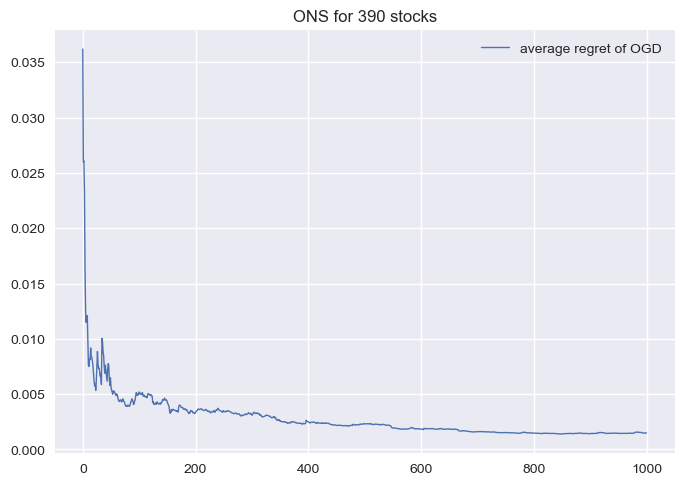

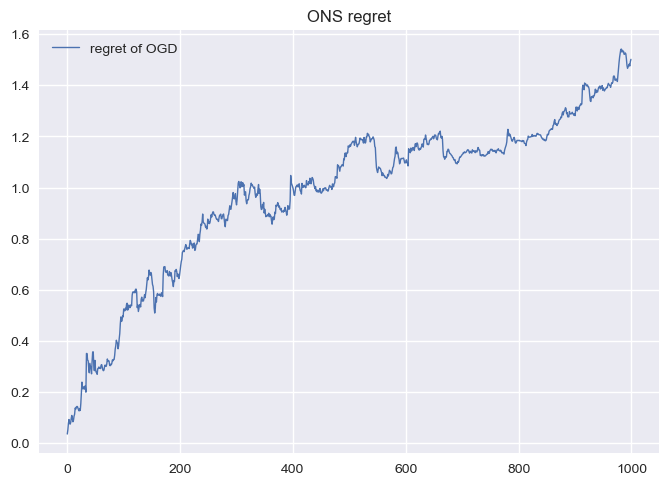

In [16]:
plt.figure()
plt.plot(avg_regret_ONS[:1000], linewidth=1, label='average regret of OGD')
plt.legend(loc='best')
#plt.savefig('./result/OGD_part/OGDloss_for_390_stocks.png',bbox_inches='tight') 
plt.title('ONS for 390 stocks')
plt.show()
plt.figure()
plt.plot(acu_regret_ONS[:1000], linewidth=1, label='regret of OGD')
plt.legend(loc='best')
#plt.savefig('./result/OGD_part/OGDregret_for_390 stocks.png',bbox_inches='tight') 
plt.title('ONS regret')
plt.show()

### up

In [102]:

#Donot use up, It need lots of time 

#universal portfolio(up)
def binnings(n, k, cache={}):
    if n == 0:
        return np.zeros((1, k))
    if k == 0:
        return np.empty((0, 0))
    args = (n, k)
    if args in cache:
        return cache[args]
    a = binnings(n - 1, k, cache)
    a1 = a + (np.arange(k) == 0)
    b = binnings(n, k - 1, cache)
    b1 = np.hstack((np.zeros((b.shape[0], 1)), b))
    result = np.vstack((a1, b1))
    cache[args] = result
    return result

def portfolio_wealth(b, stock_data):
    return np.prod(np.dot(stock_data,b))

def up_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    ret=[]
    weight=[sum(cur_stg)]
    #calculate regret
    # regre=0
    # acu_regret=[]
    # avg_regret=[]
    # T=1
    allocation_granularity = 1
    all_portfolio_allocations = binnings(allocation_granularity, len(df.columns))
    row_sums = all_portfolio_allocations.sum(axis=1)
    all_portfolios = all_portfolio_allocations / row_sums[:,np.newaxis]
    for i in tqdm(range(len(df))):
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
        arr_pfl.append(cur_pfl)
        last_stg = cur_stg.copy()
        #calculate regret
        # regre=regre+np.log(cur_ret)
        # regret=minstrategy_logre[i]-regre
        # acu_regret.append(regret)
        # avg_regret.append(regret/T)
        #update
        portfolio_weights = np.array([portfolio_wealth(x, 1+df_num[:i,:]) for x in list(all_portfolios)])
        weighted_portfolio = np.dot(portfolio_weights, all_portfolios)
        cur_stg = weighted_portfolio / np.sum(portfolio_weights)

        arr_stg.append(cur_stg)
    return arr_pfl , arr_stg, ret, weight

        
arr_pfl_up , arr_stg_up , ret_up, weight_up= up_algo(df)     

100%|██████████| 5033/5033 [05:00<00:00, 16.75it/s]


### SGP
SGP-1 is OGD with loss function of $\log(w*(1+r))$

SGP-2 add regular term

In [29]:
def SGP_update(x_old, ETA, g, num_of_var):
    x = cp.Variable(num_of_var, nonneg=True)
    objective = cp.Minimize(cp.norm(x_old-ETA*g-x,2))
    constraints = [cp.sum(x) == 1]
    prob = cp.Problem(objective, constraints)
    result = prob.solve(solver='SCS')

    return x.value

def SGP_algo(df_num):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    #calculate regret
    # regre=0
    # acu_regret=[]
    # avg_regret=[]
    # T=1
    # regret=0

    for i in tqdm(range(len(df))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
       
       
        ETA=0.08

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (df_num[i,:]+1)/np.dot(cur_stg,df_num[i,:]+1)
        #calculate regret
        # regre=regre+np.log(cur_ret)
        # regret=minstrategy_logre[i]-regre
        # acu_regret.append(regret)
        # avg_regret.append(regret/T)
        # T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        cur_stg = OGD_update(cur_stg, ETA, direction, len(df.columns))
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight#,acu_regret,avg_regret

arr_pfl_SGP , arr_stg_SGP , ret_SGP, weight_SGP= SGP_algo(df_num)#,acu_regretSGP,avg_regret_SGP

  0%|          | 0/5033 [00:00<?, ?it/s]

100%|██████████| 5033/5033 [00:40<00:00, 124.84it/s]


In [30]:


def SGP2_algo(df_num):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    #calculate regret
    # regre=0
    # acu_regret=[]
    # avg_regret=[]
    # T=1
    # regret=0

    for i in tqdm(range(len(df))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
       
        lam=0.2
        ETA=1/lam
        
        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = (lam*cur_stg)-1 * (df_num[i,:]+1)/np.dot(cur_stg,df_num[i,:]+1)
        #calculate regret
        # regre=regre+np.log(cur_ret)
        # regret=minstrategy_logre[i]-regre
        # acu_regret.append(regret)
        # avg_regret.append(regret/T)
        # T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        cur_stg = OGD_update(cur_stg, ETA, direction, len(df.columns))
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight#,acu_regret,avg_regret

arr_pfl_SGP2 , arr_stg_SGP2 , ret_SGP2, weight_SGP2= SGP2_algo(df_num)#,acu_regretSGP2,avg_regret_SGP2

100%|██████████| 5033/5033 [00:36<00:00, 136.26it/s]


### RM (log)

In [31]:
#RM algorithms
def RM_update(regret_old,x_old,loss):
    regret=(regret_old)+(np.dot(loss,x_old)-loss)
    x=np.maximum(regret,0)/np.sum(np.maximum(regret,0))
    return regret, x

def RMlog_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    ret=[]
    weight=[sum(cur_stg)]
    
    regret_old=0
    flag=1

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (df_num[i,:]+1)/np.dot(cur_stg,df_num[i,:]+1)
        last_stg = cur_stg.copy()
     
        regret_old,cur_stg = RM_update(regret_old,cur_stg ,direction)

        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_RMlog , arr_stg_RMlog , ret_RMlog, weight_RMlog= RMlog_algo(df)  


100%|██████████| 5033/5033 [00:01<00:00, 4297.36it/s]


In [32]:
#RM+ algorithms
def RMPLUS_update(regret_old,x_old,loss):
    regret=np.maximum(regret_old+(np.dot(loss,x_old)-loss),0)
    x=regret/np.sum(regret)
    return regret, x

def RMPLUSlog_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 1e-3
    ret=[]
    weight=[sum(cur_stg)]
    ETA=1.2
    regret_old=0

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (df_num[i,:]+1)/np.dot(cur_stg,df_num[i,:]+1)
        last_stg = cur_stg.copy()
        
        regret_old,cur_stg = RMPLUS_update(regret_old,cur_stg ,direction)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_RMPLUSlog, arr_stg_RMPLUSlog , ret_RMPLUSlog, weight_RMPLUSlog= RMPLUSlog_algo(df)  

100%|██████████| 5033/5033 [00:01<00:00, 4564.84it/s]


In [146]:
ret_RMPLUSlog

[0.9969594038083276,
 0.9934707053160822,
 1.0006069502972494,
 0.9931232899299947,
 1.0049978760957812,
 0.9931661585183297,
 0.9983814097667624,
 1.0114104041812093,
 1.0050265080994505,
 0.9881605435923057,
 1.0052837527746663,
 1.0025402265738388,
 1.0126455792346494,
 0.998545533910618,
 1.0043350128340434,
 1.007667132433827,
 0.9979806199999424,
 1.0046929628368226,
 1.0143994399457306,
 0.9977822772299602,
 0.9942022749644807,
 0.9987194534448444,
 1.0135328922774052,
 1.0026993935846245,
 1.0099439371075494,
 1.0115880288747676,
 0.9996178653927179,
 1.0043806149665544,
 0.9895495783985571,
 1.0060030462783238,
 1.000551608028979,
 1.0078724721116037,
 1.0016969946519565,
 0.9947633159238882,
 1.0022040565344532,
 0.9965893428409878,
 1.0087341135546675,
 0.9881146724731115,
 0.98396010935492,
 1.0006251528604473,
 0.9994172705817695,
 1.0004657066463727,
 0.9989517644300994,
 0.9896899691430137,
 0.9999375180563134,
 1.0130381360102456,
 0.9990214285428693,
 1.003170374892450

### EG log

In [158]:
# EG algorithm
def EG_update(x_old,loss,ETA):
    x=np.multiply(x_old,np.exp(-1*loss*ETA)/np.dot(x_old,np.exp(-1*loss*ETA)))
    return x
                  
def EGlog_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    ret=[]
    weight=[sum(cur_stg)]
    ETA=5

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction =  -1 * (df_num[i,:]+1)/np.dot(cur_stg,df_num[i,:]+1)
        last_stg = cur_stg.copy()
        
        cur_stg = EG_update(cur_stg, direction, ETA)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_EGlog , arr_stg_EGlog , ret_EGlog, weight_EGlog= EGlog_algo(df)  

  0%|          | 0/5033 [00:00<?, ?it/s]

100%|██████████| 5033/5033 [00:01<00:00, 3984.71it/s]


### Nested OGD

In [100]:
# algo_name=['euqally_weight','OGD',"OMD",'buyandhold','EG','RM','RM+','market_cap']
# algos_ret=(np.array([ret_EW,ret_OGD,ret_OMD,ret_BH,ret_EG,ret_RM,ret_RMPLUS,ret_MC]).T)-1
# algos_ret=(np.array([ret_OMD,ret_EG,ret_OGD,ret_BH]).T)-1
# algo_name=['OGD',"OMD",'EG','RM','RM+']
# algos_ret=(np.array([ret_OGD,ret_OMD,ret_EG,ret_RM,ret_RMPLUS]).T)-1


In [171]:
algo_name=['OGD','OMD','EG','RM','RM+','EGlog','RMlog','RMpluslog','ONS','SPG1','SPG2']
algos_ret=(np.array([ret_OGD,ret_OMD,ret_EG,ret_RM,ret_RMPLUS,ret_EGlog,ret_RMlog,ret_RMPLUSlog,ret_ONS,ret_SGP,ret_SGP2]).T)-1

In [39]:
algos_minstrategy_re=[]
for i in tqdm(range(algos_ret.shape[0])):
    x=minstrategy_regret(algos_ret[:i+1,:])
    algos_minstrategy_re.append(x)
# algos_minstrategy_re

100%|██████████| 5033/5033 [00:38<00:00, 132.20it/s]


In [172]:
def NestedOGD_algo(algos_ret):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/algos_ret.shape[1]] * algos_ret.shape[1])
    last_stg = np.array([1/algos_ret.shape[1]] * algos_ret.shape[1])
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1
    # regret=0

    for i in tqdm(range(len(algos_ret))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + algos_ret[i,:])+(1-np.sum(cur_stg))
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
        
        
        ETA=0.5

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (algos_ret[i,:]+1)/np.dot(cur_stg,algos_ret[i,:]+1) #-1 * (np.log(algos_ret[i,:]+1))
        regre=regre+(direction@cur_stg)
        # regremin=minstrategy_regret(algos_ret[:i+1,:])
        regret=regre-algos_minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        cur_stg = OGD_update(cur_stg, ETA, direction, algos_ret.shape[1])
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight,acu_regret,avg_regret

arr_pfl_NOGD , arr_stg_NOGD , ret_NOGD, weight_NOGD,acu_regret_NOGD,avg_regret_NOGD= NestedOGD_algo(algos_ret)
# arr_pfl_NOGD , arr_stg_NOGD , ret_NOGD, weight_NOGD= NestedOGD_algo(algos_ret)

  0%|          | 0/5033 [00:00<?, ?it/s]

100%|██████████| 5033/5033 [00:34<00:00, 145.01it/s]


### nested EG

In [173]:
def NestedEG_algo(algos_ret):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/algos_ret.shape[1]] * algos_ret.shape[1])
    last_stg = np.array([1/algos_ret.shape[1]] * algos_ret.shape[1])
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1
    ETA=2
    # regret=0

    for i in tqdm(range(len(algos_ret))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + algos_ret[i,:])+(1-np.sum(cur_stg))
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
        
        

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (algos_ret[i,:]+1)/np.dot(cur_stg,algos_ret[i,:]+1)# -1 * (np.log(algos_ret[i,:]+1))
        regre=regre+(direction@cur_stg)
        # regremin=minstrategy_regret(algos_ret[:i+1,:])
        regret=regre-algos_minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        cur_stg = EG_update(cur_stg, direction, ETA)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight,acu_regret,avg_regret

arr_pfl_NEG , arr_stg_NEG , ret_NEG, weight_NEG,acu_regret_NEG,avg_regret_NEG= NestedEG_algo(algos_ret)


100%|██████████| 5033/5033 [00:00<00:00, 19433.41it/s]


In [ ]:
def RMPLUS_update(regret_old,x_old,loss):
    regret=np.maximum(regret_old+(np.dot(loss,x_old)-loss),0)
    x=regret/np.sum(regret)
    return regret, x

In [145]:
algos_ret[0,:]+1
np.dot(cur_stg,algos_ret[0,:]+1)

0.9969594038083276

### nested RM 

In [174]:
def NestedRMPLUS_algo(algos_ret):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/algos_ret.shape[1]] * algos_ret.shape[1])
    last_stg = np.array([1/algos_ret.shape[1]] * algos_ret.shape[1])
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1
    regret_old=0

    for i in tqdm(range(len(algos_ret))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + algos_ret[i,:])+(1-np.sum(cur_stg))
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
        
        

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction =  -1 * (np.log(algos_ret[i,:]+1))
        regre=regre+(direction@cur_stg)
        # regremin=minstrategy_regret(algos_ret[:i+1,:])
        regret=regre-algos_minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        regret_old,cur_stg = RMPLUS_update(regret_old,cur_stg ,direction)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight,acu_regret,avg_regret

arr_pfl_NRMP , arr_stg_NRMP , ret_NRMP, weight_NRMP,acu_regret_NRMP,avg_regret_NRMP= NestedRMPLUS_algo(algos_ret)


100%|██████████| 5033/5033 [00:00<00:00, 22375.04it/s]


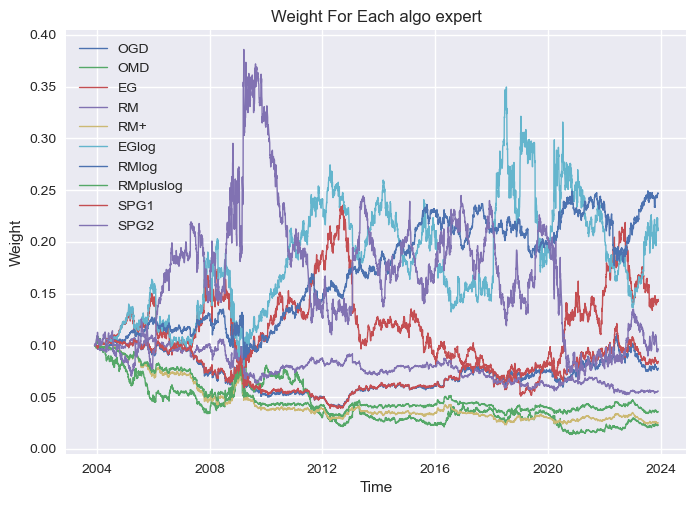

In [177]:
arr_stg = pd.DataFrame( arr_stg_NEG[1:], columns=algo_name)

plt.figure()
for stk in arr_stg.columns:
    plt.plot(df.index,arr_stg.loc[:,stk], linewidth=1,label=stk)
    #plt.legend(loc='best')

#plt.plot(df.index, arr_stg.loc[:,'cash'], linewidth=1, label=stk)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Weight')
plt.title('Weight For Each algo expert')
plt.savefig('./result/algos_part/NOMD_Weight_For_Each_algo_expertfor_390 stocks.png',bbox_inches='tight') 
plt.show()

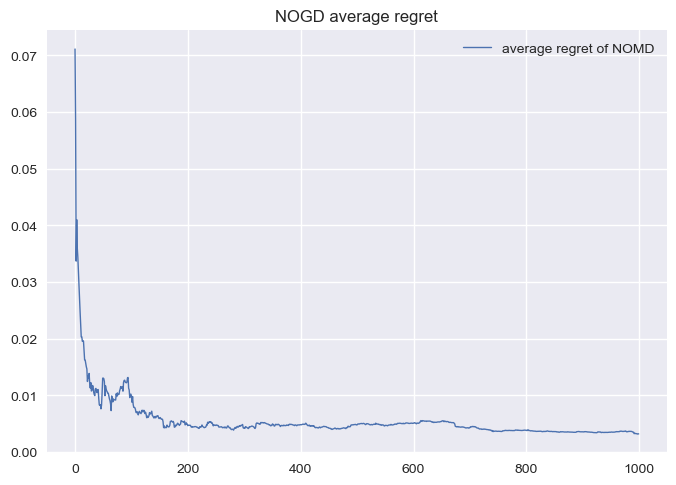

In [108]:
plt.figure()
plt.plot(avg_regret_OMD[:1000], linewidth=1, label='average regret of NOMD')
plt.legend(loc='best')

plt.title('NOGD average regret')
plt.savefig('./result/algos_part/NOMD_avgregretfor_390_stocks.png',bbox_inches='tight') 
plt.show()

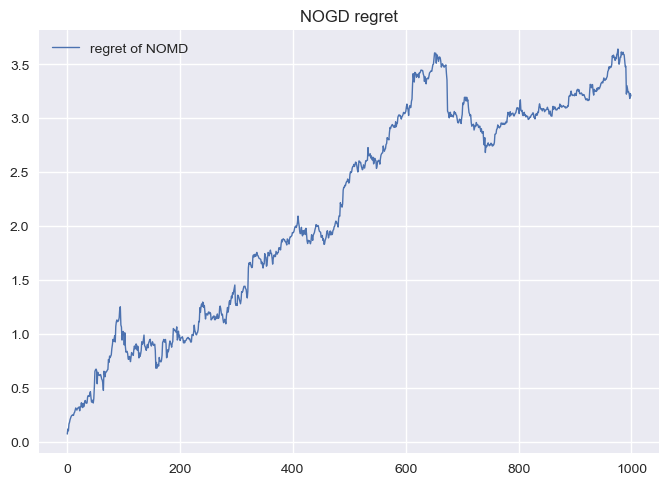

In [109]:
plt.figure()
plt.plot(acu_regret_OMD[:1000], linewidth=1, label='regret of NOMD')
plt.legend(loc='best')

plt.title('NOGD regret')
plt.savefig('./result/algos_part/NOMD_regretfor_390 stocks.png',bbox_inches='tight') 
plt.show()

### Graph

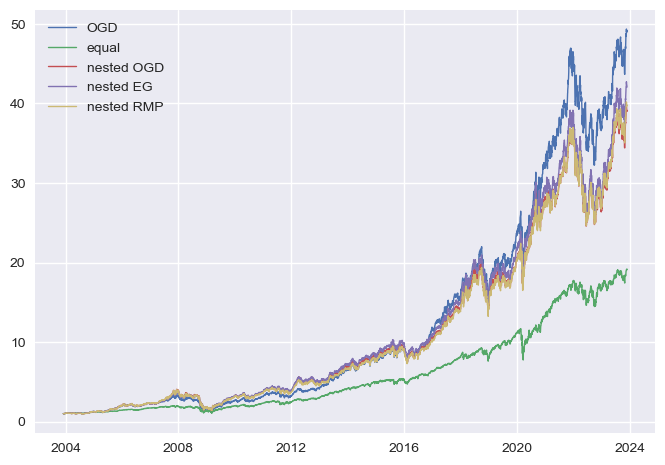

In [176]:
plt.figure()
plt.plot(df.index, arr_pfl_OGD[:-1], linewidth=1, label='OGD')
# plt.plot(df.index, arr_pfl_OMD[:-1], linewidth=1, label='OMD')
# # plt.plot(df.index, arr_BCRP[1:], linewidth=1, label='BCRP')
plt.plot(df.index,arr_equal[:-1], linewidth=1, label='equal')
# plt.plot(df.index, arr_pfl_up[:-1], linewidth=1, label='up')
# plt.plot(df.index, arr_pfl_BH[:-1], linewidth=1, label='buy and hold')
# plt.plot(df.index, arr_pfl_EG[:-1], linewidth=1, label='EG')
# plt.plot(df.index,arr_pfl_RM[:-1], linewidth=1, label='RM')
# plt.plot(df.index,arr_pfl_RMPLUS[:-1], linewidth=1, label='RM+')
# plt.plot(df.index,arr_pfl_MC[:-1], linewidth=1, label='market cap')
plt.plot(df.index,arr_pfl_NOGD[:-1], linewidth=1, label='nested OGD')
# plt.plot(df.index,arr_pfl_ONS[:-1], linewidth=1, label='ONS')
# plt.plot(df.index,arr_pfl_SGP[:-1], linewidth=1, label='SGP')
# plt.plot(df.index,arr_pfl_SGP2[:-1], linewidth=1, label='SGP2')
# plt.plot(df.index,arr_pfl_RMlog[:-1], linewidth=1, label='RMlog')
# plt.plot(df.index,arr_pfl_RMPLUSlog[:-1], linewidth=1, label='RMPLUSlog')
# plt.plot(df.index,arr_pfl_EGlog[:-1], linewidth=1, label='EGlog')
plt.plot(df.index,arr_pfl_NEG[:-1], linewidth=1, label='nested EG')
plt.plot(df.index,arr_pfl_NRMP[:-1], linewidth=1, label='nested RMP')

plt.legend(loc='best')
#plt.savefig('./result/OGD_part/OGD_perfo_390stocks.png',bbox_inches='tight') 
plt.savefig('./result/discussion/all_algo_perfo_390stocks.png',bbox_inches='tight') 
plt.show()

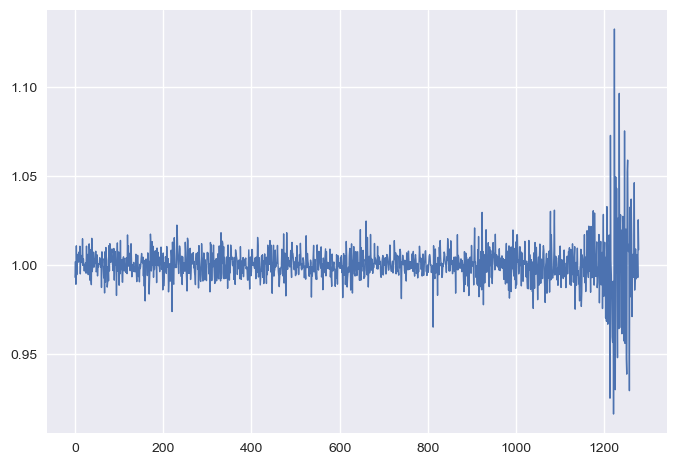

In [93]:
plt.figure()
plt.plot(ret_ONS[1:], linewidth=1, label='OGD')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


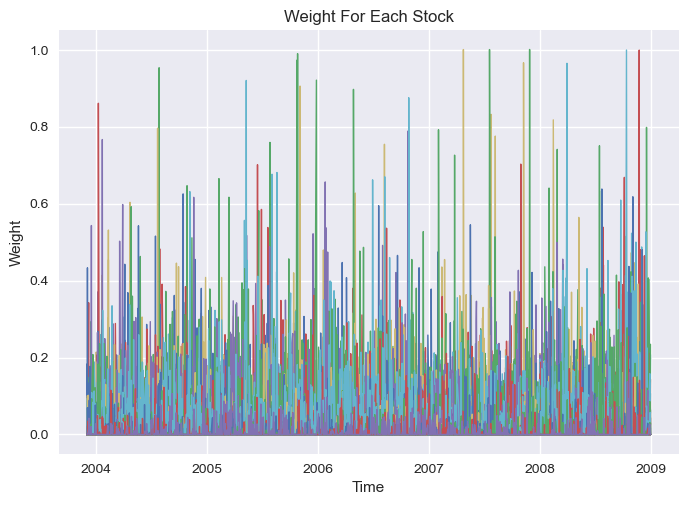

In [63]:
arr_stg = pd.DataFrame( arr_stg_SGP2[1:], columns=df.columns)

plt.figure()
for stk in arr_stg.columns:
    plt.plot(df.index,arr_stg.loc[:,stk], linewidth=1)#label=stk)
    #plt.legend(loc='best')

#plt.plot(df.index, arr_stg.loc[:,'cash'], linewidth=1, label=stk)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Weight')
plt.title('Weight For Each Stock')
#plt.savefig(f'result/OGD_part/390stocks_all_weight.png',bbox_inches='tight')
plt.show()

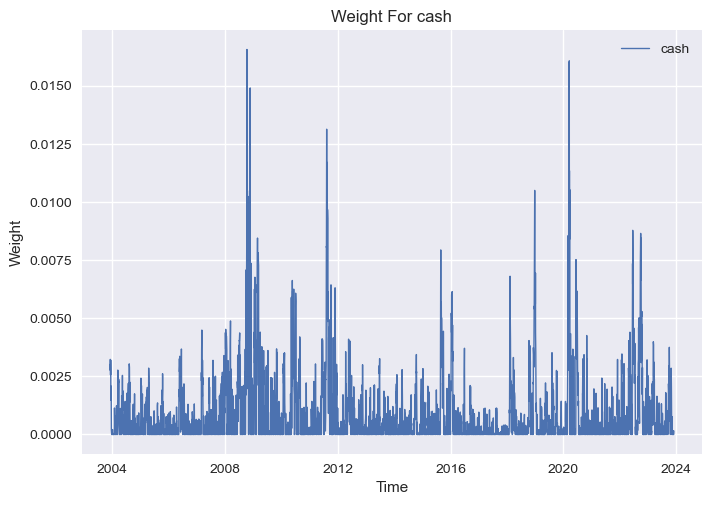

In [38]:
plt.figure()
plt.plot(df.index, arr_stg.loc[:,'cash'], linewidth=1, label=stk)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Weight')
plt.title('Weight For cash')
#plt.savefig(f'result\OGD_part/390stocks_cash_weight.png',bbox_inches='tight')
plt.show()

### Evaluate

In [110]:
all_algo_name=['euqally_weight','OGD',"OMD",'buyandhold','EG','RM','RM+','market_cap','nested_OGD']
algos_arr_pfl=np.array([arr_equal,arr_pfl_OGD,arr_pfl_OMD,arr_pfl_BH,arr_pfl_EG,arr_pfl_RM,arr_pfl_RMPLUS,arr_pfl_MC,arr_pfl_NOGD]).T

In [183]:
all_algo_name=['OGD','EG','RM','RM+','EGlog','RMlog','RMpluslog',"nestOGD",'nest EG','NRMP','ons','up']
algos_arr_pfl=np.array([arr_pfl_OGD,arr_pfl_EG,arr_pfl_RM,arr_pfl_RMPLUS,arr_pfl_EGlog,arr_pfl_RMlog,arr_pfl_RMPLUSlog,arr_pfl_NOGD
                        ,arr_pfl_NEG,arr_pfl_NRMP,arr_pfl_ONS,arr_pfl_up]).T
all_algos_ret=np.array([ret_OGD,ret_EG,ret_RM,ret_RMPLUS,ret_EGlog,ret_RMlog,ret_RMPLUSlog,ret_NOGD
                        ,ret_NEG,ret_NRMP,ret_ONS,ret_up]).T

In [169]:
def find_MDD(algos_arr_pfl):#max drawdown
    acumax=np.maximum.accumulate(algos_arr_pfl,axis=0)
    Mdd=(acumax-algos_arr_pfl)/acumax
    Mdd=np.max(Mdd,axis=0)
    return Mdd
    
def evaluation(algos_arr_pfl,all_algo_name,all_algos_ret):
    years=algos_arr_pfl.shape[0]/252
    df=pd.DataFrame([],index=all_algo_name)
    total_ret=algos_arr_pfl[-1,:]/algos_arr_pfl[0,:]
    df['Anual_ret']=total_ret**(1/years)-1
    risk=np.std(all_algos_ret,axis=0)/np.sqrt(years)
    df['std']=risk
    t_statistic=np.mean(all_algos_ret-1,axis=0)/(np.std(all_algos_ret,axis=0)/np.sqrt(len(all_algos_ret)))
    df['t-statistic']=t_statistic
    Mdd=find_MDD(algos_arr_pfl)
    df['MDD']=Mdd
    annual_return=(algos_arr_pfl[-1,:]**(1/years))-1
    calmar_ratio=annual_return/Mdd
    df['calmar_ratio']=calmar_ratio
    sharp_ratio=annual_return/risk
    df['sharp_ratio']=sharp_ratio
    return df

evaluation_df=evaluation(algos_arr_pfl,all_algo_name,all_algos_ret)
    
    
    
    
    

In [184]:
evaluation_df.sort_values(by='sharp_ratio',ascending=False)

,Anual_ret,std,t-statistic,MDD,calmar_ratio,sharp_ratio
RMlog,0.251390,0.003643,4.459417,0.616793,0.407576,69.015304
nest EG,0.223064,0.003483,4.198573,0.632385,0.352735,64.049665
OGD,0.215328,0.003367,4.186099,0.609710,0.353165,63.950826
RMpluslog,0.191849,0.003057,4.104080,0.543470,0.353008,62.752698
NRMP,0.222248,0.003587,4.097783,0.651773,0.340990,61.965965
RM+,0.180593,0.002937,4.029706,0.535151,0.337462,61.496885
nestOGD,0.226967,0.003707,4.067847,0.672404,0.337545,61.221921
up,0.175374,0.002872,4.002099,0.506861,0.346001,61.064073
RM,0.206075,0.003403,4.011448,0.615966,0.334556,60.559565
EG,0.225102,0.004146,3.744674,0.728918,0.308816,54.297324


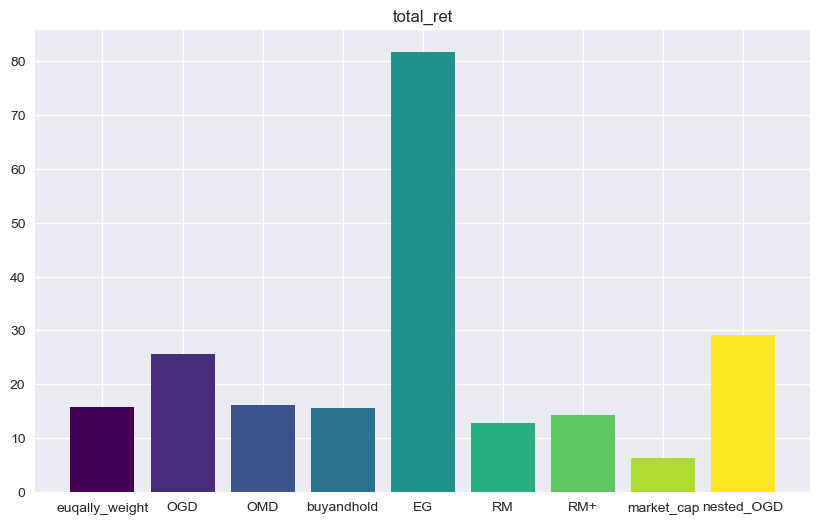

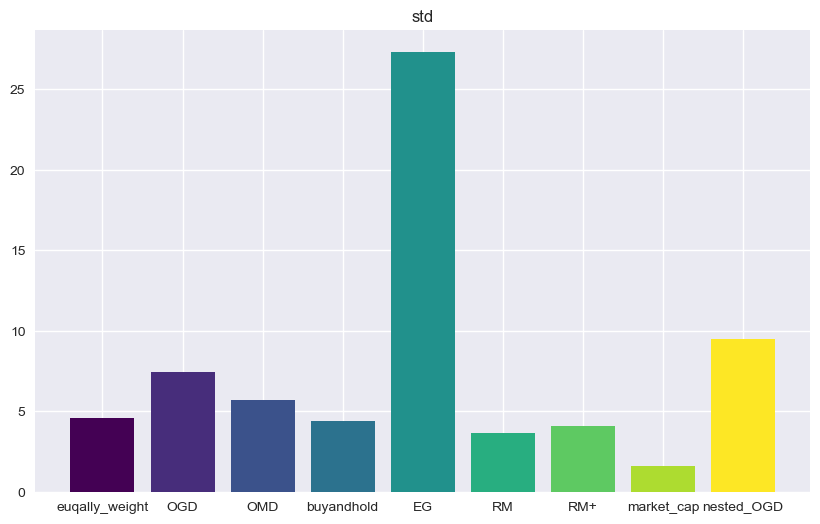

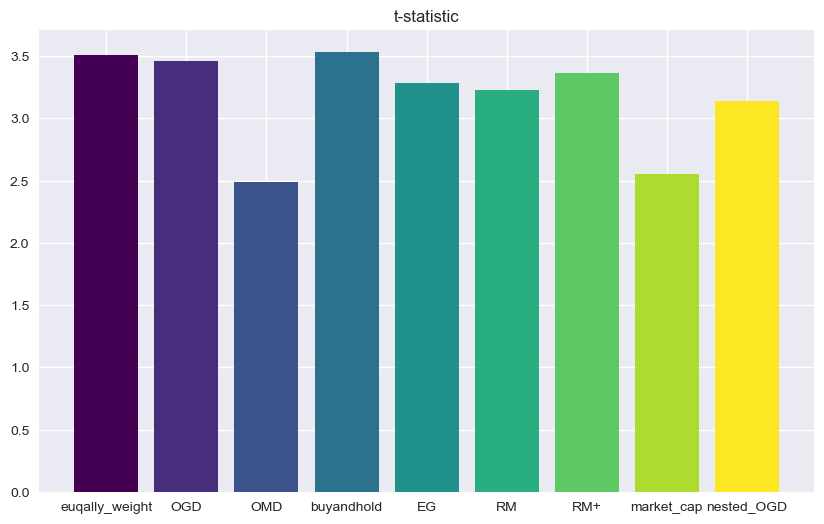

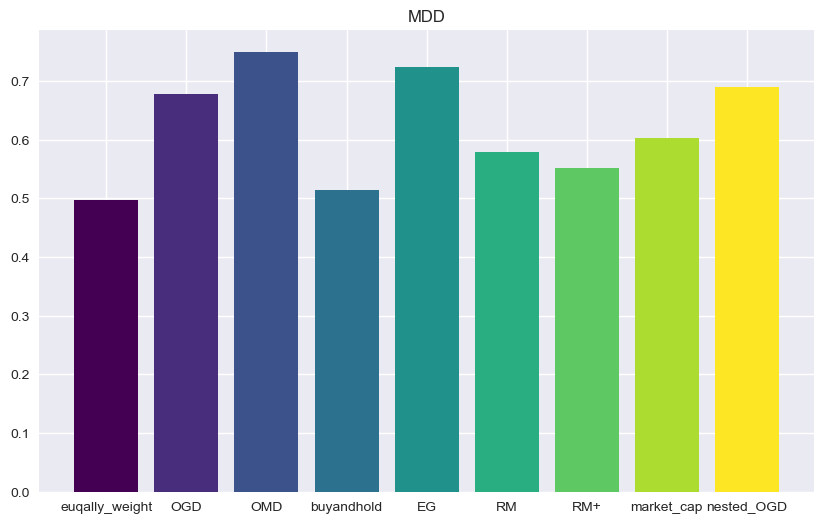

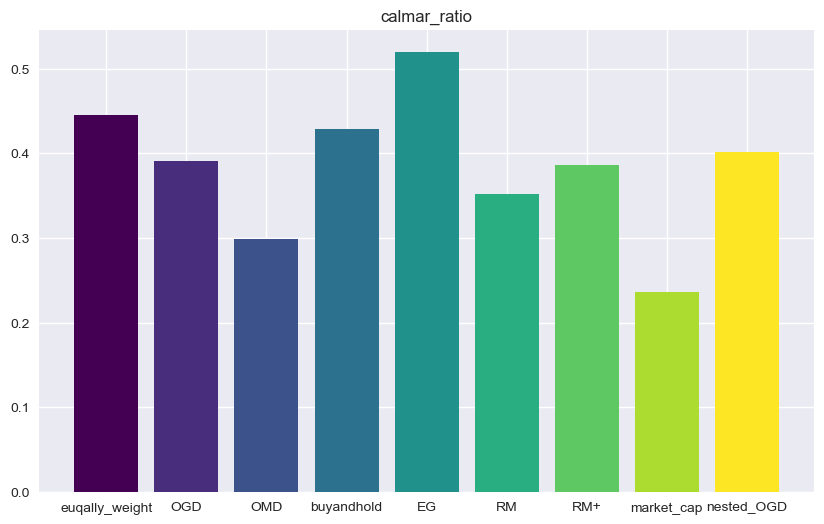

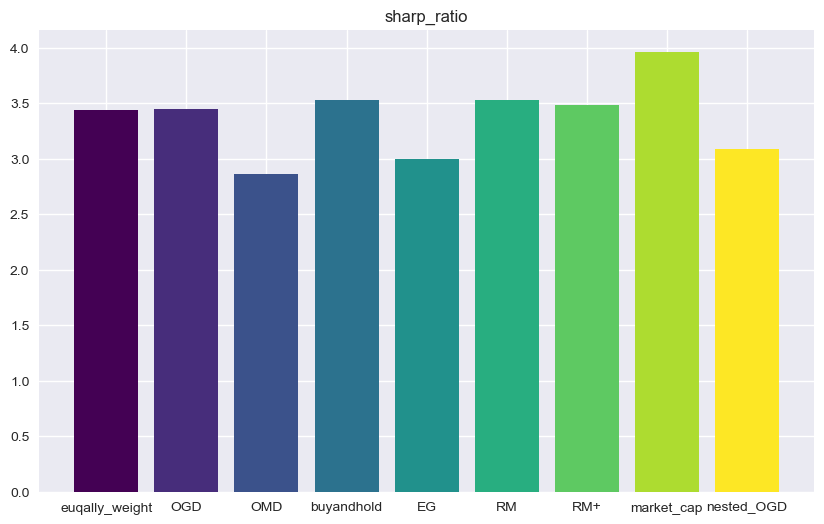

In [113]:

colors = plt.cm.viridis(np.linspace(0, 1, len(evaluation_df)))
for i in range(len(evaluation_df.columns)):
    plt.figure(figsize=(10,6))
    plt.bar(evaluation_df.index,evaluation_df.iloc[:,i],color=colors)
    plt.title(f'{evaluation_df.columns[i]}')
    plt.savefig(f'./result/discussion/evluation_390stocks{evaluation_df.columns[i]}.png',bbox_inches='tight')
    
    plt.show()